<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/Базовая%20валюта%20инвестиционного%20портфеля.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

## Валюта инвестиционного портфеля: USD, EUR или RUB?

Полная версия статьи доступна на сайте проекта [Рост сбережений](https://rostsber.ru/publish/stocks/portfolio_base_currency.html).

In [3]:
import matplotlib. pyplot as plt

import okama as ok

### Доходность BND при базовой валюте USD

Создаем список активов из одного ETF - Vanguard Total Bond Market Index Fund.   
Базовая валюта - доллары США (USD).  
Дата начала наблюдений - февраль 2016 года. Дата конца наблюдений - апрель 2021 год (5 лет).

In [4]:
y = ok.AssetList(['BND.US'], ccy='USD', first_date='2016-02', last_date='2021-04')

In [6]:
y.get_cagr(real=True) # среднегодовая реальная доходность

BND.US    0.010813
dtype: float64

In [7]:
y.get_cumulative_return(real=True) # накопленная реальная доходность

BND.US    0.05714
dtype: float64

### Доходность BND при базовой валюте RUB

Такой же список активов, но с базовой валютой - рубли (RUB).

In [8]:
x = ok.AssetList(['BND.US'], ccy='RUB', first_date='2016-02', last_date='2021-04')
x

symbols                   [BND.US]
currency                       RUB
first_date                 2016-02
last_date                  2021-03
period_length    5 years, 2 months
inflation                 RUB.INFL
dtype: object

In [17]:
x.get_cagr(real=True) # среднегодовая реальная доходность

BND.US   -0.006636
dtype: float64

In [18]:
x.get_cumulative_return(real=True) # накопленная реальная доходность

BND.US   -0.033815
dtype: float64

In [9]:
df = x.wealth_indexes

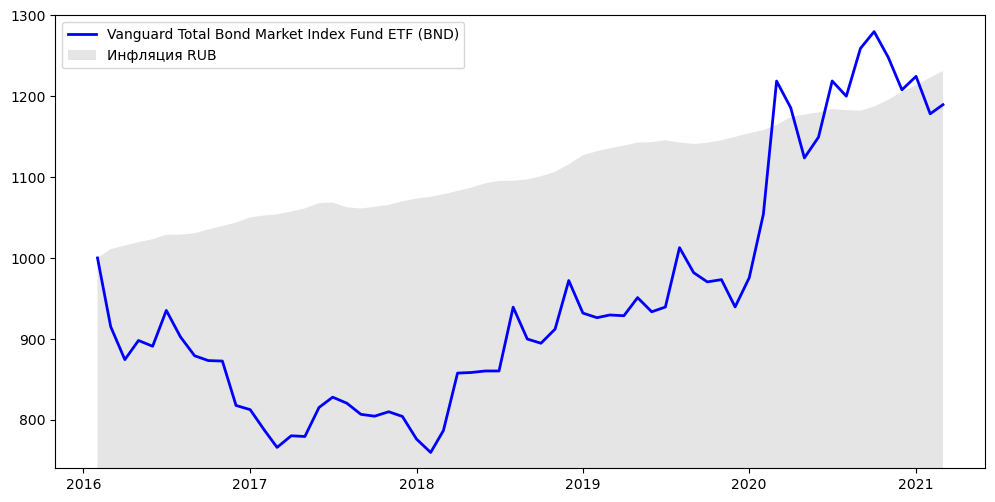

In [16]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['BND.US'], color = 'blue', linewidth = 2, label='Vanguard Total Bond Market Index Fund ETF (BND)')

ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_ylim(740, 1300)
leg = ax.legend()

### Курс доллара в промежуток 2016 - 2021

<AxesSubplot:title={'center':'Курс USD-RUB'}, xlabel='Дата', ylabel='Курс валюты'>

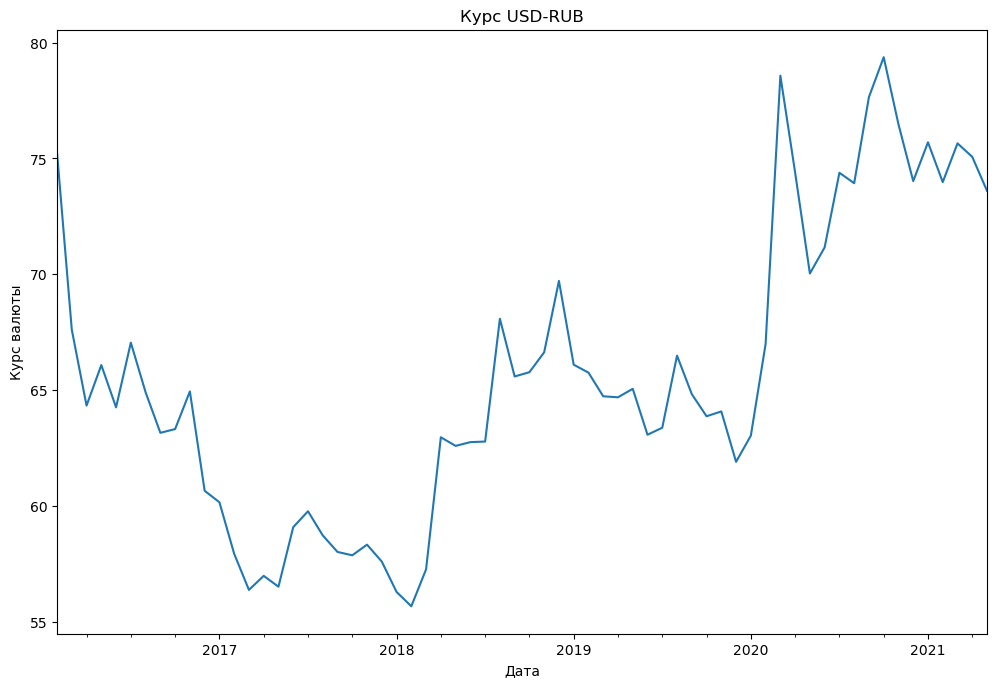

In [22]:
y = ok.QueryData.get_close('USDRUB.FX', period='M')  # сколько долларов дают за рубль
y['2016-02':].plot(xlabel="Дата", ylabel="Курс валюты", title="Курс USD-RUB")

<AxesSubplot:title={'center':'Курс USD-RUB'}, xlabel='Дата', ylabel='Курс валюты'>

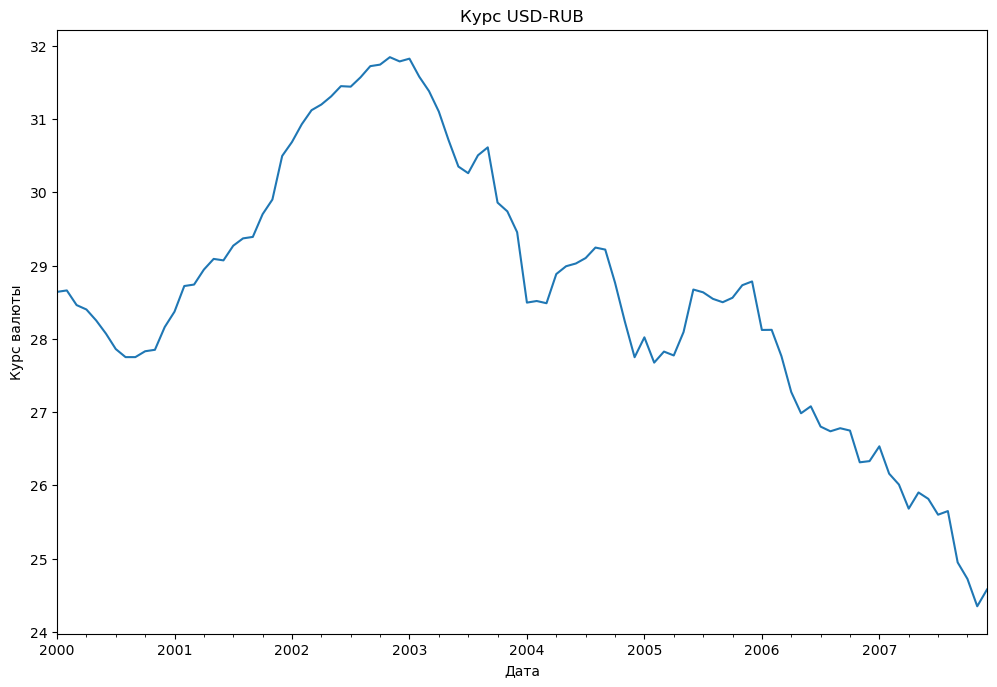

In [25]:
y['2000': '2007'].plot(xlabel="Дата", ylabel="Курс валюты", title="Курс USD-RUB")